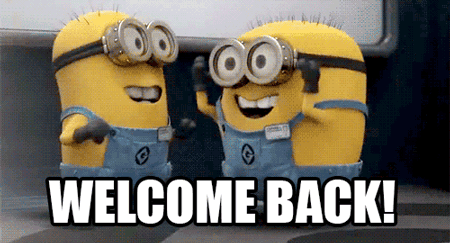

So today we are going to learn about VGG-16 and built it completely from Scratch.

# VGG-16

### Reference video : https://youtu.be/j1jIoHN3m0s

### Reference video : https://youtu.be/GrLaytcy15M


**Watch both the videos mentioned above before moving ahead**

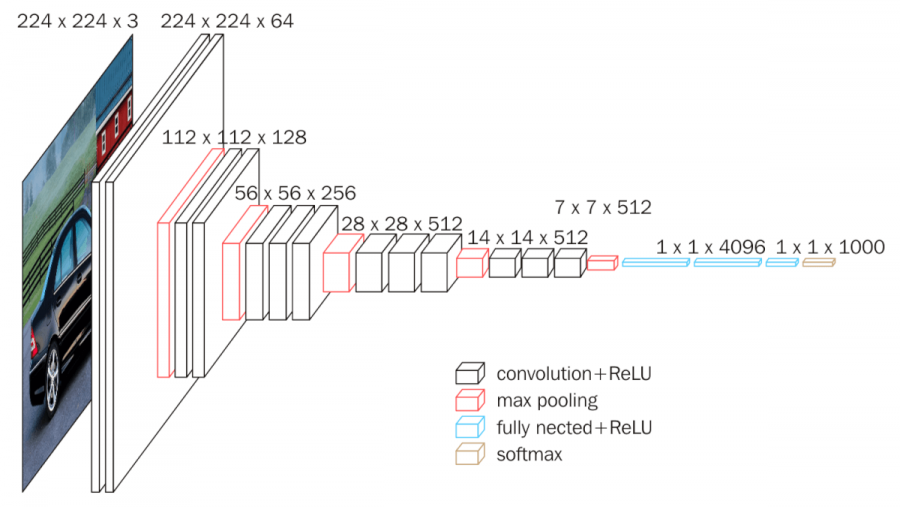

VGG is basically an acronym for the **Visual Geometric Group** from Oxford University and VGG-16 is a network with 16 layers proposed by the Visual Geometric Group. These 16 layers contain the trainable parameters and there are other layers also like the Max pool layer but those do not contain any trainable parameters. This architecture was the 1st runner up of the Visual Recognition Challenge of 2014 i.e. ILSVRC-2014 and was developed by Simonyan and Zisserman.


The VGG research group released a series of the convolution network model starting from VGG11 to VGG19. The main intention of the VGG group on depth was to understand how the depth of convolutional networks affects the accuracy of the models of large-scale image classification and recognition. The minimum VGG11 has 8 convolutional layers and 3 fully connected layers as compared to the maximum VGG19 which has 16 convolutional layers and the 3 fully connected layers. The different variations of VGGs are exactly the same in the last three fully connected layers. The overall structure includes 5 sets of convolutional layers, followed by a MaxPool. But the difference is that as the depth increases that is as we move from VGG11 to VGG19 more and more cascaded convolutional layers are added in the five sets of convolutional layers.

## How was VGG better from earlier published model architectures :    




So what was new in this model compared to the top-performing models AlexNet-2012 and ZFNet-2013 of the past years? First and foremost, compared to the large receptive fields in the first convolutional layer, this model proposed the use of a very small 3 x 3 receptive field (filters) throughout the entire network with the stride of 1 pixel. Please note that the receptive field in the first layer in AlexNet was 11 x 11 with stride 4, and the same was 7 x 7 in ZFNet with stride 2. 

The idea behind using 3 x 3 filters uniformly is something that makes the VGG stand out. Two consecutive 3 x 3 filters provide for an effective receptive field of 5 x 5. Similarly, three 3 x 3 filters make up for a receptive field of 7 x 7. This way, a combination of multiple 3 x 3 filters can stand in for a receptive area of a larger size. 

But then, what is the benefit of using three 3 x 3 layers instead of a single 7 x 7 layer? Isn’t it increasing the no. of layers, and in turn, the complexity unnecessarily? No. In addition to the three convolution layers, there are also three non-linear activation layers instead of a single one you would have in 7 x 7. This makes the decision functions more discriminative. It would impart the ability to the network to converge faster. 

Secondly, it also reduces the number of weight parameters in the model significantly. Assuming that the input and output of a three-layer 3 x 3 convolutional stack have C channels, the total number of weight parameters will be 3 * 32 C2 = 27 C2. If we compare this to a 7 x 7 convolutional layer, it would require 72 C2 = 49 C2, which is almost twice the 3 x 3 layers. Additionally, this can be seen as a regularization on the 7 x 7 convolutional filters forcing them to have a decomposition through the 3 x 3 filters, with, of course, the non-linearity added in-between by means of ReLU activations. This would reduce the tendency of the network to over-fit during the training exercise. 

Another question is – can we go lower than 3 x 3 receptive size filters if it provides so many benefits? The answer is “No.” 3 x 3 is considered to be the smallest size to capture the notion of left to right, top to down, etc. So lowering the filter size further could impact the ability of the model to understand the spatial features of the image.

The consistent use of 3 x 3 convolutions across the network made the network very simple, elegant, and easy to work with.

## VGG Architecture

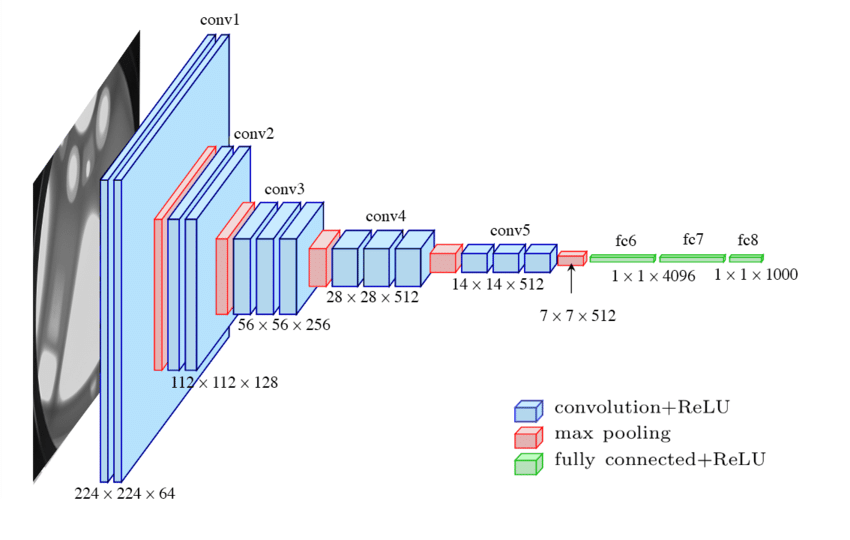

In the above mentioned figure, all the blue rectangles represent the **convolution layers** along with the non-linear activation function which is a **rectified linear** unit (or ReLU). It can be seen from the figure that there are 13 blue and 5 red rectangles i.e there are **13 convolution layers** and **5 max-pooling layers**. Along with these, there are 3 green rectangles representing **3 fully connected layers**. So, the total number of layers having tunable parameters is 16 of which 13 is for convolution layers and 3 for fully connected layers, thus the name is given as VGG-16. At the output, we have a softmax layer having 1000 outputs per image category in the imagenet dataset.

In this architecture,  started, it has with a very low channel size of 64 and then gradually increased by a factor of 2 after each max-pooling layers, until it reaches 512.

Now, below we have mentioned the flattened architecture of VGG-16: 

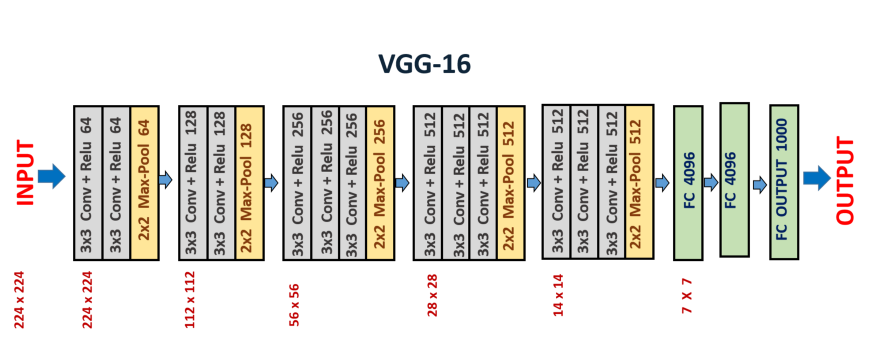

This architecture is actually very simple. It has got 2 contiguous blocks of 2 convolution layers followed by a max-pooling, then it has 3 contiguous blocks of 3 convolution layers followed by max-pooling, and at last, we have 3 dense layers. The last 3 convolution layers have different depths in different architectures.

The important thing to analyze here is that after every max-pooling the size is getting half.

## Important Features


1. **Input Layer**: It accepts color images as an input with the size 224 x 224 and 3 channels i.e. Red, Green, and Blue.
2. **Convolution Layer**: The images pass through a stack of convolution layers where every convolution filter has a very small receptive field of 3 x 3 and stride of 1. Every convolution kernel uses row and column padding so that the size of input as well as the output feature maps remains the same or in other words, the resolution after the convolution is performed remains the same.
3. **Max pooling**: It is performed over a max-pool window of size 2 x 2 with stride equals to 2, which means here max pool windows are non-overlapping windows.
4. Not every convolution layer is followed by a max pool layer as at some places a convolution layer is following another convolution layer without the max-pool layer in between.
5. The first two fully connected layers have 4096 channels each and the third fully connected layer which is also the output layer have 1000 channels, one for each category of images in the imagenet database.
6. The hidden layers have ReLU as their activation function.


## Now let us dive into this mathematically:

# The formula involved in calculating the output size from each convolution layer is given as :-  **[(N-f)/S] + 1**

Here we have an input of a shape of 224 x 224 with K channels i.e. 224 x 224 x K. We’ll apply convolution with different sizes kernels with stride =1.

**Case-1: When we have a kernel size of 3 x 3**

**After the First convolution**

N = 224, f = 3, S = 1

Output shape = [(N-f)/S] + 1 = [(224–3)/1] + 1 = 222

**After the Second convolution**

N = 222, f = 3, S = 1

Output shape = [(N-f)/S] + 1 = [(222–3)/1] + 1 = 220

**After the Third convolution**

N = 220, f = 3, S = 1

Output shape = [(N-f)/S] + 1 = [(220–3)/1] + 1 = 218

So, after three simultaneous convolutions, we got an output of size 218 x 218 x K
**Case-2: When we have a kernel size of 7 x 7**

N = 224, f = 7, S = 1

Output shape = [(N-f)/S] + 1 = [(224–7)/1] + 1 = 218

So, after one convolution only we got an output of size **218 x 218 x K**

Hence, looking at the above two cases we say that the three 3 × 3 convolution layers have an effective receptive field of 7 × 7.

Now, let's have a look on the advantages of having 3x3 kernel size

## Advantages

1. As we know more the layers of convolution more sharply the features will be extracted from our input as compared to when we have fewer layers. So having 3 x 3 kernel size would lead to much better feature extraction than 7 x 7 kernel size.


2. When we take 3 x 3 kernel size the number of trainable parameters will be 27K² as compared to 7 x 7 kernel size when taken gives 49K² trainable parameters which is 81% more.

Let's Calculate the complete architecture of **vgg-16**

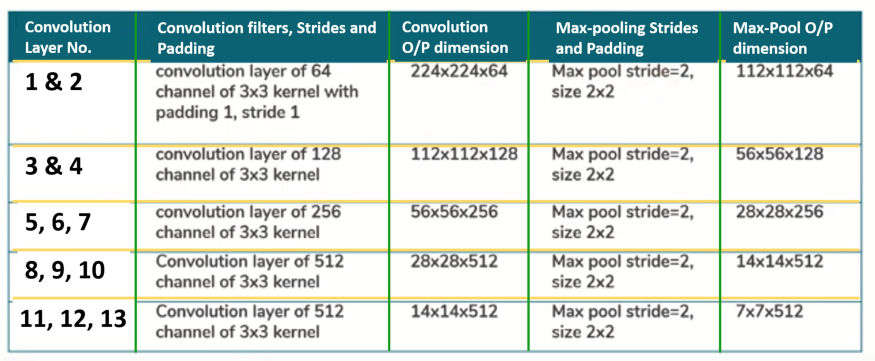

## Input layer:    

*   The size of the input image is 224 x 224.


**Convolution Layer - 1:**

* Input size = N = 224

* Filter size = f = 3 x 3

* No. of filters = 64

* Strides = S = 1

* Padding = P = 1

* Output feature map size = [(224–3+2)/1] + 1 = 224

* Output with channels = 224 x 224 x 64



**Convolution Layer - 2:**

* Input size = N = 224
* Filter size = f = 3 x 3
* No. of filters = 64
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(224–3+2)/1] + 1 = 224
* Output with channels = 224 x 224 x 64



**Max-Pooling Layer - 1:**

* Input size = N = 224
* Filter size = f = 2 x 2
* Strides = S = 2
* Padding = P = 0
* Output feature map size = [(224–2+0)/2] + 1 = 112
* Output with channels = 112 x 112 x 64

**Convolution Layer - 3:**

* Input size = N = 112
* Filter size = f = 3 x 3
* No. of filters = 128
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(112–3+2)/1] + 1 = 112
* Output with channels = 112 x 112 x 128

**Convolution Layer - 4:**

* Input size = N = 112
* Filter size = f = 3 x 3
* No. of filters = 128
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(112–3+2)/1] + 1 = 112
* Output with channels = 112 x 112 x 128

**Max-Pooling Layer - 2:**

* Input size = N = 112
* Filter size = f = 2 x 2
* Strides = S = 2
* Padding = P = 0
* Output feature map size = [(112–2+0)/2] + 1 = 56
* Output with channels = 56 x 56 x 128

**Convolution Layer - 5:**

* Input size = N = 56
* Filter size = f = 3 x 3
* No. of filters = 256
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(56–3+2)/1] + 1 = 56
* Output with channels = 56 x 56 x 256

**Convolution Layer - 6:**

* Input size = N = 56
* Filter size = f = 3 x 3
* No. of filters = 256
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(56–3+2)/1] + 1 = 56
* Output with channels = 56 x 56 x 256

**Convolution Layer - 7:**

* Input size = N = 56
* Filter size = f = 3 x 3
* No. of filters = 256
* Strides = S = 1
* Padding = P = 1
* Output feature map size = [(56–3+2)/1] + 1 = 56
* Output with channels = 56 x 56 x 256

**Max-Pooling Layer - 3:**

* Input size = N = 56
* Filter size = f = 2 x 2
* Strides = S = 2
* Padding = P = 0
* Output feature map size = [(56–2+0)/2] + 1 = 28
* Output with channels = 28 x 28 x 256

Similar calculations will be performed for the rest of the network.

In [ ]:
from keras.layers.serialization import activation
# import tensorflow.compat.v2 as tf
import tensorflow.compat.v2 as tf

# from keras import backend
from keras import backend

# from keras.applications import imagenet_utils
from keras.applications import imagenet_utils

#from keras.engine import training

from keras.engine import training

#from keras.layers import VersionAwareLayers
from keras.layers import VersionAwareLayers

#from keras.utils import data_utils
from keras.utils import data_utils

# from keras.utils import layer_utils
from keras.utils import layer_utils

# from tensorflow.python.util.tf_export import keras_export
from tensorflow.python.util.tf_export import keras_export

In [ ]:
# Define VersionAwareLayers

layers = VersionAwareLayers()

# Define VGG16 class with 100 classes and softmax activation function

def VGG16(
    input_shape = None,
    classes = 100,
    classifier_activation ='softmax'
    ):


  # Determine proper input shape
  
  input_shape = imagenet_utils.obtain_input_shape(input_shape,
                                                  default_size=224,
                                                  min_size=32,
                                                  data_format=backend.image_data_format(),
                                                  require_flatten=True)
  
  
  #print the input shape
  print(input_shape)

  # img_input = layers.Input(shape=input_shape)

  img_input = layers.Input(shape=input_shape)


  # Block 1
  # Define a Conv2D layers with required parameters
  x = layers.Conv2D(64, (3,3), activation='relu', padding = 'same', name= 'b1_c1')(img_input)

      
  # Define a Conv2D layers with required parameters    
 
  x = layers.Conv2D(64, (3,3), activation='relu', padding = 'same', name= 'b1_c2')(x)

  # Define a MaxPooling2D layer 
 
  x = layers.MaxPooling2D((2,2), strides=(2,2), name='b1_pool')(x)


  # Block 2

  x = layers.Conv2D(128, (3,3), activation='relu', padding = 'same', name= 'b2_c1')(x)

      
  # Define a Conv2D layers with required parameters    
 
  x = layers.Conv2D(128, (3,3), activation='relu', padding = 'same', name= 'b2_c2')(x)

  # Define a MaxPooling2D layer 
 
  x = layers.MaxPooling2D((2,2), strides=(2,2), name='b2_pool')(x)


  # Block 3

  # Define a Conv2D layers with required parameters  
  x = layers.Conv2D(256, (3,3), activation='relu', padding = 'same', name= 'b3_c1')(x)

  # Define a Conv2D layers with required parameters    
 
  x = layers.Conv2D(256, (3,3), activation='relu', padding = 'same', name= 'b3_c2')(x)

  # Define a Conv2D layers with required parameters

  x = layers.Conv2D(256, (3,3), activation='relu', padding = 'same', name= 'b3_c3')(x)

  # Define a MaxPooling2D layer 
 
  x = layers.MaxPooling2D((2,2), strides=(2,2), name='b3_pool')(x)


  # Block 4
  # Define a Conv2D layers with required parameters  
  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b4_c1')(x)

  # Define a Conv2D layers with required parameters    
 
  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b4_c2')(x)

  # Define a Conv2D layers with required parameters

  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b4_c3')(x)

  # Define a MaxPooling2D layer 
 
  x = layers.MaxPooling2D((2,2), strides=(2,2), name='b4_pool')(x)


  # Block 5

  # Define a Conv2D layers with required parameters  
  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b5_c1')(x)

  # Define a Conv2D layers with required parameters    
 
  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b5_c2')(x)

  # Define a Conv2D layers with required parameters

  x = layers.Conv2D(512, (3,3), activation='relu', padding = 'same', name= 'b5_c3')(x)

  # Define a MaxPooling2D layer 
 
  x = layers.MaxPooling2D((2,2), strides=(2,2), name='b5_pool')(x)

  # Classification block
  
  x = layers.Flatten(name='flatten')(x)

  x = layers.Dense(4096, activation='relu', name='fc1')(x)
  
  x = layers.Dense(4096, activation='relu', name='fc2')(x)

  x = layers.Dense(classes, activation=classifier_activation, name='predictions')(x)

  # Create model.
  model = training.Model(img_input, x, name='VGG16')
  
  # return the model
  return model

In [ ]:
# Define a VGG16 instance
vgg16 = VGG16()

# Model Summary
vgg16.summary()



(224, 224, 3)
Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 b1_c1 (Conv2D)              (None, 224, 224, 64)      1792      
                                                                 
 b1_c2 (Conv2D)              (None, 224, 224, 64)      36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 b2_c1 (Conv2D)              (None, 112, 112, 128)     73856     
                                                                 
 b2_c2 (Conv2D)              (None, 112, 112, 128)     147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 56, 56, 128

In [ ]:
# Architecture Visualized 




In [ ]:
# Import tensorflow 
import tensorflow

# import keras
from tensorflow import keras

# import matplotlib.pyplot

import matplotlib.pyplot as plt

# import os 
import os

# import time
import time


In [ ]:
from tensorflow.keras.datasets import cifar100
# Load Cifar100 dataset from Keras Datasets

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
# Split the data in training, validation and testing sets
validation_images, validation_labels = train_images[:2000], train_labels[:2000]
print(validation_images.shape, validation_labels.shape)

train_images, train_labels = train_images[2000:10000], train_labels[2000:10000]
print(train_images.shape, train_labels.shape)


(2000, 32, 32, 3) (2000, 1)
(8000, 32, 32, 3) (8000, 1)


In [ ]:
print(train_images.shape, train_labels.shape)

(8000, 32, 32, 3) (8000, 1)


In [ ]:
# Make a train. test, validation dataset object  
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [ ]:
print(len(train_ds))
for images_batch, labels_batch in train_ds.take(2):
    print('images batch shape:', images_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

8000
images batch shape: (32, 32, 3)
labels batch shape: (1,)


In [ ]:
# Function to process images 
def images_process(image, label):

    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    
    # Resize images from 32x32 to 224x244
    image = tf.image.resize(image, (224, 224))
    
    # return the imaage and label
    return image, label

In [ ]:
# Get size of the train, test and validation set

train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()

test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()

valid_ds_size = tf.data.experimental.cardinality(valid_ds).numpy()
print('train_ds_size:', train_ds_size)
print('test_ds_size:', test_ds_size)
print('valid_ds_size:', valid_ds_size)

train_ds_size: 8000
test_ds_size: 10000
valid_ds_size: 2000


In [ ]:
# Define batch and shuffle config for train, test and validation set

train_ds = (train_ds
            .map(images_process)
            .shuffle(buffer_size = train_ds_size/10)
            .batch(batch_size=1, drop_remainder = True))

test_ds = (test_ds
           .map(images_process)
           .shuffle(buffer_size = test_ds_size/10)
           .batch(batch_size=1, drop_remainder = True))
        

valid_ds = (valid_ds
             .map(images_process)
             .shuffle(buffer_size = valid_ds_size/10)
             .batch(batch_size=1, drop_remainder = True))



In [ ]:

for images_batch, labels_batch in train_ds:
    print('images batch shape:', images_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

images batch shape: (1, 224, 224, 3)
labels batch shape: (1, 1)


In [ ]:
# Compile the model by passing loss and optimizer 

vgg16.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics='accuracy')


In [ ]:
# Fit the model upto 5 epochs with dataset and other required parameters

hist = vgg16.fit(train_ds, validation_data=valid_ds, epochs=5, batch_size=32)


Epoch 1/5
8000/8000 [==============================] - 406s 50ms/step - loss: 4.6047 - accuracy: 0.0098 - val_loss: 4.6045 - val_accuracy: 0.0110
Epoch 2/5
8000/8000 [==============================] - 397s 50ms/step - loss: 4.5797 - accuracy: 0.0196 - val_loss: 4.4865 - val_accuracy: 0.0305
Epoch 3/5
8000/8000 [==============================] - 397s 50ms/step - loss: 4.4016 - accuracy: 0.0490 - val_loss: 4.3649 - val_accuracy: 0.0520
Epoch 4/5
8000/8000 [==============================] - 397s 50ms/step - loss: 4.1882 - accuracy: 0.0766 - val_loss: 4.1570 - val_accuracy: 0.0835
Epoch 5/5
8000/8000 [==============================] - 400s 50ms/step - loss: 3.8890 - accuracy: 0.1194 - val_loss: 4.0342 - val_accuracy: 0.1050


Text(0, 0.5, 'losses')

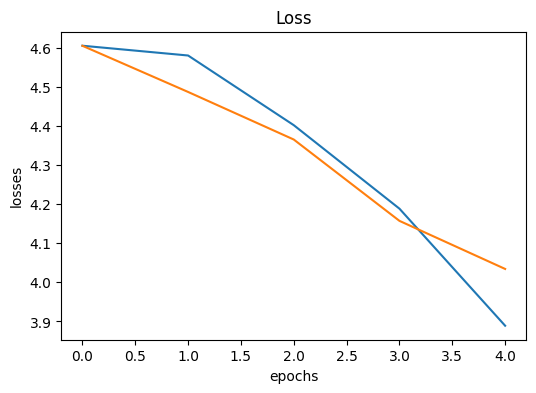

In [ ]:

plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

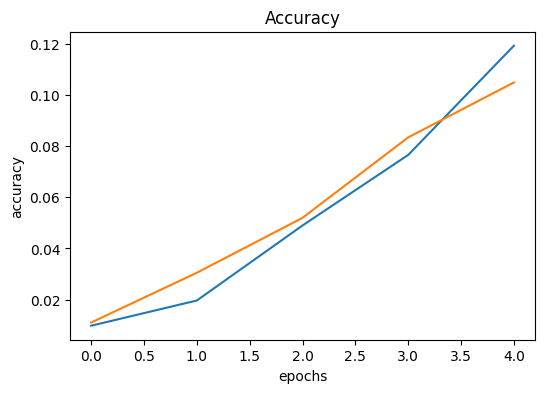

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
score = vgg16.evaluate(test_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.004233360290527
Test accuracy: 0.10599999874830246


In [ ]:
print(vgg16.metrics_names)
print(score)

['loss', 'accuracy']
[4.004233360290527, 0.10599999874830246]



Now training the model completely from scratch will take hell lot of time. So for now just understand what is happening and just learn how to code VGG-16 comopletely from scratch.

In the upcoming assignments we'll be learning transfer learning and we'll be using the pre-trained models inorder to make predictions..


Now we  have seen how to code vgg-16 completely from Scratch.
Let's see the basic difference between VGG and AlexNet.

# How is VGG-16 different of  AlexNet

As compared to VGG-16 where all the convolution kernels are of the uniform size 3 x 3 with stride as 1, the AlexNet has convolution kernels of variable size like 5 x 5 and 3 x 3.

Though AlexNet uses multiple kernels of different sizes, the realization of every convolution kernel of different sizes can be done using multiple 3 x 3 size kernels.


# Great Work

**FEEDBACK FORM**

Please help us to improve by filling this form.
https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s

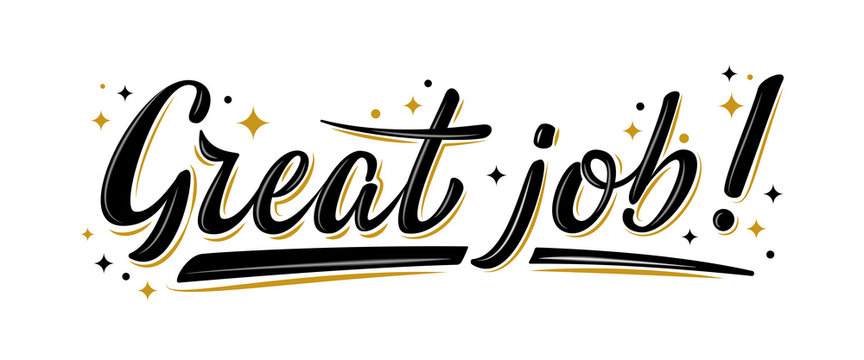



## Congratulations! You have now learn to implement VGG-16 completely from scratch.

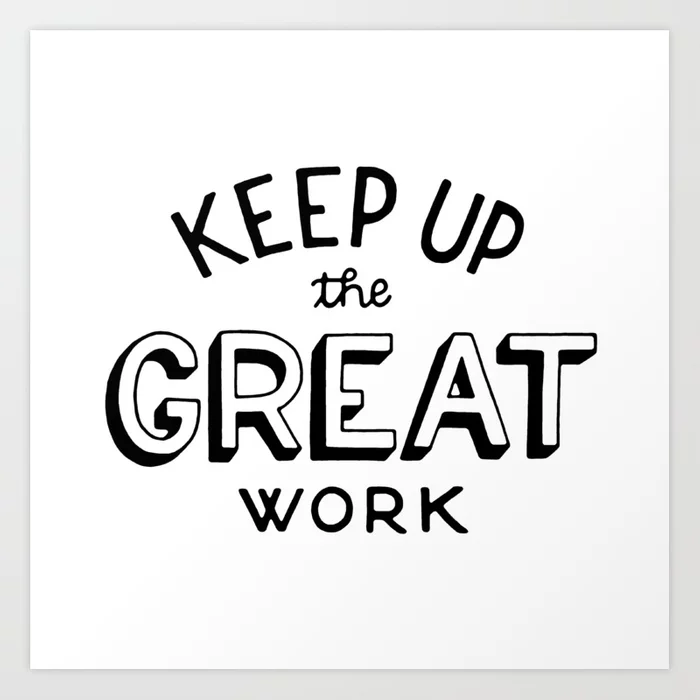